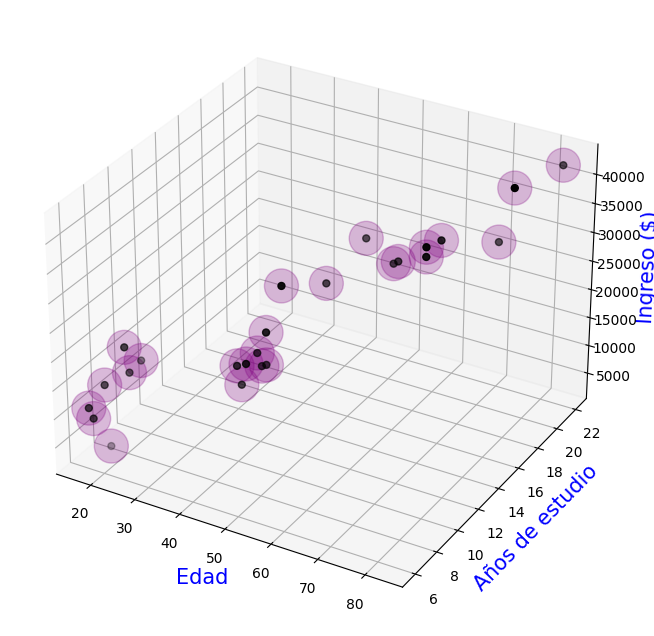

In [15]:
#discovering how to handle data or mising values with k-neighbots  with python
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.impute import KNNImputer
#data context

age = np.array([17,18,18,19,20,
                21,21,40,41,42,
                42,43,44,44,45,
                50,54,60,61,67,
                67,68,76,79,83])

study = np.array([6, 6, 7, 7, 8,
                    8, 9, 10, 10, 10,
                    11, 11, 11, 11, 12,
                    14, 16, 16, 16, 16,
                    16, 17, 19, 19, 22])

earning = np.array([11230, 9624, 13798, 3215, 19169,
                    14982, 15419, 17286, 14232, 18092,
                    18318, 16260, 22347, 16710, 28949,
                    27309, 32779, 29743, 30341, 34088,
                    32435, 33909, 32263, 42067, 42295])

data = np.stack((age, study, earning), axis=1)


#graphic

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection="3d")

ax.scatter(data.T[0], data.T[1], data.T[2],
           marker="o", c="purple", s=600, alpha=0.25)

ax.scatter(data.T[0], data.T[1], data.T[2],
           marker=".", c="black", s=100)


ax.set_xlabel("Edad", fontsize=15, color="blue")
ax.set_ylabel("Años de estudio", fontsize=15, color="blue")
ax.set_zlabel("Ingreso ($)", fontsize=15, color="blue")

plt.show()


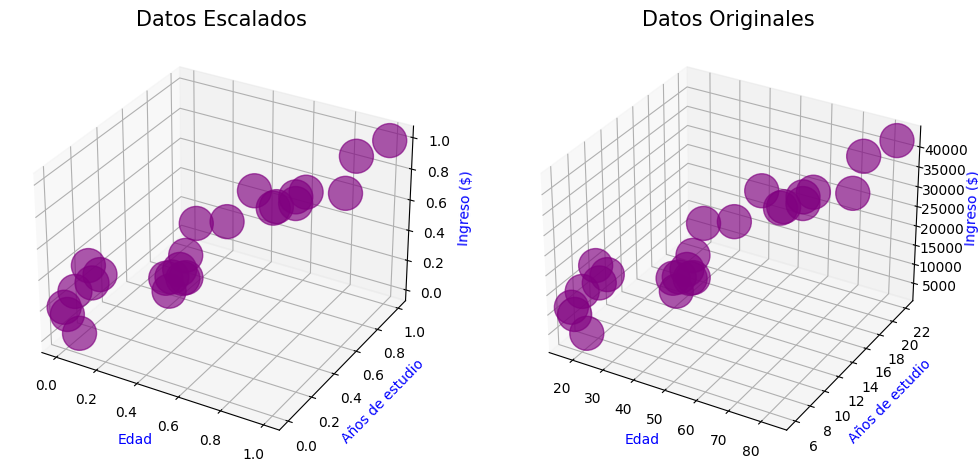

In [16]:
scalator = preprocessing.MinMaxScaler()
scaled = scalator.fit_transform(data)

#Tridimentional graphic of sacled data

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,2,1, projection= "3d")

ax.scatter(
    scaled.T[0],
    scaled.T[1],
    scaled.T[2],
    marker="o", c="purple", s=600, alpha=0.65
)
ax.set_title("Datos Escalados", fontsize=15)
ax.set_xlabel("Edad", fontsize=10, color="blue")
ax.set_ylabel("Años de estudio", fontsize=10, color="blue")
ax.set_zlabel("Ingreso ($)", fontsize=10, color="blue")

ax = fig.add_subplot(1,2,2, projection= "3d")

ax.scatter(
    data.T[0],
    data.T[1],
    data.T[2],
    marker="o", c="purple", s=600, alpha=0.65
)
ax.set_title("Datos Originales", fontsize=15)
ax.set_xlabel("Edad", fontsize=10, color="blue")
ax.set_ylabel("Años de estudio", fontsize=10, color="blue")
ax.set_zlabel("Ingreso ($)", fontsize=10, color="blue")



plt.show()

originales = scaled


In [17]:
scaled

array([[0.        , 0.        , 0.20509212],
       [0.01515152, 0.        , 0.16399693],
       [0.01515152, 0.0625    , 0.27080348],
       [0.03030303, 0.0625    , 0.        ],
       [0.04545455, 0.125     , 0.40823951],
       [0.06060606, 0.125     , 0.30110031],
       [0.06060606, 0.1875    , 0.3122825 ],
       [0.34848485, 0.25      , 0.36005629],
       [0.36363636, 0.25      , 0.2819089 ],
       [0.37878788, 0.25      , 0.38068066],
       [0.37878788, 0.3125    , 0.38646366],
       [0.39393939, 0.3125    , 0.33380246],
       [0.40909091, 0.3125    , 0.48955988],
       [0.40909091, 0.3125    , 0.3453173 ],
       [0.42424242, 0.375     , 0.65849539],
       [0.5       , 0.5       , 0.61653019],
       [0.56060606, 0.625     , 0.75649949],
       [0.65151515, 0.625     , 0.67881269],
       [0.66666667, 0.625     , 0.69411464],
       [0.75757576, 0.625     , 0.78999488],
       [0.75757576, 0.625     , 0.74769703],
       [0.77272727, 0.6875    , 0.78541453],
       [0.

In [18]:
missing = scaled.copy()
missing[[2,7,12,17,22], 2]  = np.nan
missing

array([[0.        , 0.        , 0.20509212],
       [0.01515152, 0.        , 0.16399693],
       [0.01515152, 0.0625    ,        nan],
       [0.03030303, 0.0625    , 0.        ],
       [0.04545455, 0.125     , 0.40823951],
       [0.06060606, 0.125     , 0.30110031],
       [0.06060606, 0.1875    , 0.3122825 ],
       [0.34848485, 0.25      ,        nan],
       [0.36363636, 0.25      , 0.2819089 ],
       [0.37878788, 0.25      , 0.38068066],
       [0.37878788, 0.3125    , 0.38646366],
       [0.39393939, 0.3125    , 0.33380246],
       [0.40909091, 0.3125    ,        nan],
       [0.40909091, 0.3125    , 0.3453173 ],
       [0.42424242, 0.375     , 0.65849539],
       [0.5       , 0.5       , 0.61653019],
       [0.56060606, 0.625     , 0.75649949],
       [0.65151515, 0.625     ,        nan],
       [0.66666667, 0.625     , 0.69411464],
       [0.75757576, 0.625     , 0.78999488],
       [0.75757576, 0.625     , 0.74769703],
       [0.77272727, 0.6875    , 0.78541453],
       [0.

In [23]:
imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputer_uni = imputer.fit_transform(missing)

imputer = KNNImputer(n_neighbors=5, weights="distance")
imputer_dist = imputer.fit_transform(missing)

stackComparation = np.stack((imputer_uni, imputer_dist), axis=1)
stackComparation

array([[[0.        , 0.        , 0.20509212],
        [0.        , 0.        , 0.20509212]],

       [[0.01515152, 0.        , 0.16399693],
        [0.01515152, 0.        , 0.16399693]],

       [[0.01515152, 0.0625    , 0.21568577],
        [0.01515152, 0.0625    , 0.12480668]],

       [[0.03030303, 0.0625    , 0.        ],
        [0.03030303, 0.0625    , 0.        ]],

       [[0.04545455, 0.125     , 0.40823951],
        [0.04545455, 0.125     , 0.40823951]],

       [[0.06060606, 0.125     , 0.30110031],
        [0.06060606, 0.125     , 0.30110031]],

       [[0.06060606, 0.1875    , 0.3122825 ],
        [0.06060606, 0.1875    , 0.3122825 ]],

       [[0.34848485, 0.25      , 0.3456346 ],
        [0.34848485, 0.25      , 0.32663701]],

       [[0.36363636, 0.25      , 0.2819089 ],
        [0.36363636, 0.25      , 0.2819089 ]],

       [[0.37878788, 0.25      , 0.38068066],
        [0.37878788, 0.25      , 0.38068066]],

       [[0.37878788, 0.3125    , 0.38646366],
        [0.378

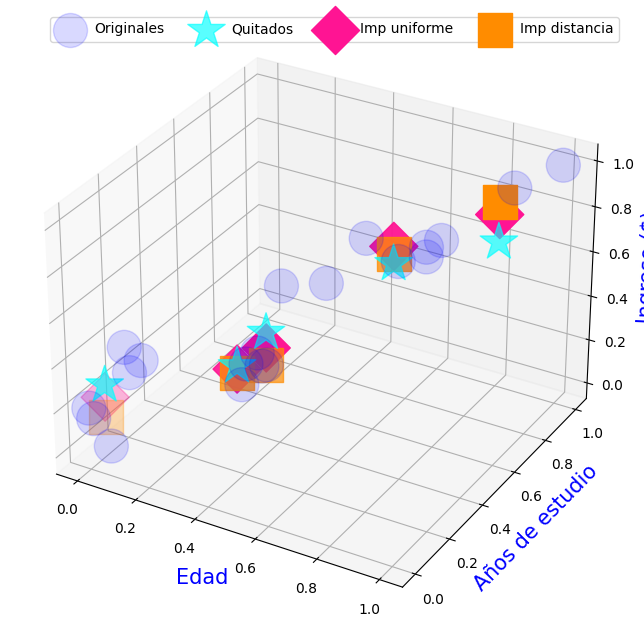

In [24]:
fig = plt.figure(figsize=(8, 8))

filtro = ~np.isnan(missing.T[2])

ax = fig.add_subplot(1, 1, 1, projection="3d")

ax.scatter(scaled.T[0][filtro],
           scaled.T[1][filtro],
           scaled.T[2][filtro],
           label="Originales",
           marker="o", c="blue", s=600, alpha=0.15)

ax.scatter(scaled.T[0][~filtro],
           scaled.T[1][~filtro],
           scaled.T[2][~filtro],
           label="Quitados",
           marker="*", c="cyan", s=800, alpha=0.65)

ax.scatter(imputer_uni.T[0][~filtro],
           imputer_uni.T[1][~filtro],
           imputer_uni.T[2][~filtro],
           label="Imp uniforme",
           marker="D", c="deeppink", s=600)

ax.scatter(imputer_dist.T[0][~filtro],
           imputer_dist.T[1][~filtro],
           imputer_dist.T[2][~filtro],
           label="Imp distancia",
           marker="s", c="darkorange", s=600)

ax.set_xlabel("Edad", fontsize=15, color="blue")
ax.set_ylabel("Años de estudio", fontsize=15, color="blue")
ax.set_zlabel("Ingreso ($)", fontsize=15, color="blue")
ax.legend(ncol=4)

plt.show()